# Trabajo Práctico 2 - Machine Learning
*Felicitas Marolda*

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import importlib

## Parte 1: Diagnóstico de Cancer de Mama
El conjunto de datos de este problema fue generado a partir de imágenes histopatológicas de biopsias mamarias. Se extrajeron variables morfológicas y moleculares de las células, incluyendo tamaño, forma, densidad nuclear, tasa de mitosis y presencia de mutaciones. El objetivo es predecir el diagnóstico del tumor (benigno o maligno). Para una descripción más detallada del conjunto de datos, consulte cell_diagnosis_description.md. 

In [3]:
import sys
sys.path.append('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src')  # Reemplaza con la ruta real
import models as mod
importlib.reload(mod)
import metrics as met
importlib.reload(met)
import preprocessing as pp
importlib.reload(pp)

<module 'preprocessing' from 'c:\\Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/src\\preprocessing.py'>

In [4]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

### Ejercicio 1.1
Realizar un análisis exploratorio de los datos para visualizar la distribución de las variables e identificar valores faltantes, outliers y variables categóricas. Investigar los rangos posibles de cada feature y analizar su correlación con el target.

In [5]:
# imprimimos una muestra de los datos
print(cell_diagnosis_dev_imbalanced.sample(5))
print("-"*50)
print(cell_diagnosis_dev.sample(5))

# hacemos un pairplot para ver la distribucion de los datos
# sns.pairplot(cell_diagnosis_dev, hue='CellType', palette='husl')  
# plt.title('Pairplot of Cell Diagnosis Dataset')
# plt.show()

# sns.pairplot(cell_diagnosis_dev_imbalanced, hue='CellType', palette='rocket')
# plt.title('Pairplot of Cell Diagnosis Dataset (Imbalanced)')
# plt.show()

      CellSize  CellShape  NucleusDensity  ChromatinTexture  CytoplasmSize  \
599  49.137772   0.549685        1.780910         32.896699      14.542705   
513  64.369301   0.492969        1.495600               NaN      25.884007   
252  64.649022        NaN             NaN               NaN      24.706719   
299  67.839235   0.487205        1.386708         24.916140      27.999084   
21   66.440194   0.528592        1.477180         21.270330      26.835668   

     CellAdhesion  MitosisRate  NuclearMembrane  GrowthFactor  \
599      0.482320     5.993992         2.696049     45.998880   
513           NaN     3.488459         2.516719     60.028043   
252           NaN          NaN         2.465903     62.419168   
299      0.513366     3.003711         2.547430     54.537614   
21       0.500306     3.280931         2.591028     58.922860   

     OxygenSaturation  Vascularization  InflammationMarkers  Diagnosis  \
599        100.000000         9.421082                  NaN       

In [6]:
cell_diagnosis_dev_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev_imbalanced.csv')
cell_diagnosis_dev = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_dev.csv')
cell_diagnosis_test_imbalanced = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test_imbalanced.csv')
cell_diagnosis_test = pd.read_csv('c:/Users/felic/OneDrive/Documentos/GitHub/MLyDL_TPs/Marolda_Felicitas_TP2/Problema1/data/raw/cell_diagnosis_test.csv')

importlib.reload(pp)
importlib.reload(mod)
# sacamos los nan
# cell_diagnosis_dev_imbalanced = pp.fix_df(cell_diagnosis_dev_imbalanced)
# cell_diagnosis_dev = pp.fix_df(cell_diagnosis_dev)

new_df_dev = pp.prepare_df(cell_diagnosis_dev)
new_df_dev_imbalanced = pp.prepare_df(cell_diagnosis_dev_imbalanced)
# # hacemos KNN para sacar los cell type que estan como "???"
# cellType_x, cellType_y, features_ct, cellType_predict_X, cellType_predict_y, diagnosis, features_names = pp.prepare_for_knn_cell_type(cell_diagnosis_dev)
# knn_cell_type = mod.KNNClassifier(cellType_x, cellType_y, features_ct, 5)
# prediction_cellType = knn_cell_type.predict(cellType_predict_X)

# new_df_dev = pp.reunite_cell_type(cellType_x, cellType_y, cellType_predict_X, prediction_cellType, diagnosis, features_names)

# cellType_x, cellType_y, features_ct, cellType_predict_X, cellType_predict_y, diagnosis, features_names = pp.prepare_for_knn_cell_type(cell_diagnosis_dev_imbalanced)
# knn_cell_type = mod.KNNClassifier(cellType_x, cellType_y, features_ct, 5)
# prediction_cellType = knn_cell_type.predict(cellType_predict_X)

# new_df_dev_imbalanced = pp.reunite_cell_type(cellType_x, cellType_y, cellType_predict_X, prediction_cellType, diagnosis, features_names)

Index(['Epthlial', '???', 'Mesnchymal'], dtype='object')
Features names: ['CellSize', 'CellShape', 'NucleusDensity', 'ChromatinTexture', 'CytoplasmSize', 'CellAdhesion', 'MitosisRate', 'NuclearMembrane', 'GrowthFactor', 'OxygenSaturation', 'Vascularization', 'InflammationMarkers', 'GeneticMutationBinary', 'CellTypeEncoded']
Index(['Epthlial', '???', 'Mesnchymal'], dtype='object')
Features names: ['CellSize', 'CellShape', 'NucleusDensity', 'ChromatinTexture', 'CytoplasmSize', 'CellAdhesion', 'MitosisRate', 'NuclearMembrane', 'GrowthFactor', 'OxygenSaturation', 'Vascularization', 'InflammationMarkers', 'GeneticMutationBinary', 'CellTypeEncoded']


### Ejercicio 1.2
Implementar una clase de regresión logística binaria con regularización L2. Utilizando el conjunto de datos de desarrollo cell_diagnosis_balanced_dev.csv, dividir los datos en 80% entrenamiento y 20% validación. Entrenar el modelo sobre el conjunto de entrenamiento y evaluar su desempeño sobre el conjunto de validación.

Reportar las siguientes métricas de performance:
– Matriz de confusión
– Accuracy
– Precision
– Recall
– F-Score
– Curva Precision-Recall (PR)
– Curva ROC
– AUC-ROC
– AUC-PR

Para ajustar el hiperparámetro de regularización λ, puede utilizar F-Score como métrica de performance.

**NOTA**: Si el modelo se implementa de forma general para clasificación multiclase, el mismo código podrá ser reutilizado en el ejercicio 2.

In [7]:
# dividirmos 20% validation y 80% train
importlib.reload(pp)
train_data, val_data = pp.split_data(new_df_dev, 0.2)

# train_X, train_y, features = pp.df_breakDown(train_data, 'Diagnosis')
# val_X, val_y, _ = pp.df_breakDown(val_data, 'Diagnosis')

# print("train_X shape: ", train_X.shape)
# print("train: ", train_X[0])


Fold: 0 L2: 0 Threshold: 0.0001
TP: 0, TN: 38038, FP: 0, FN: 32718
Precision: 0
Recall: 0.0
Fscore: 0
Fold: 1 L2: 0 Threshold: 0.0001
TP: 0, TN: 38038, FP: 0, FN: 32718
Precision: 0
Recall: 0.0
Fscore: 0
Fold: 2 L2: 0 Threshold: 0.0001
TP: 0, TN: 38038, FP: 0, FN: 32718
Precision: 0
Recall: 0.0
Fscore: 0
Fold: 3 L2: 0 Threshold: 0.0001
TP: 0, TN: 38038, FP: 0, FN: 32718
Precision: 0
Recall: 0.0
Fscore: 0
Fold: 4 L2: 0 Threshold: 0.0001
TP: 0, TN: 38038, FP: 0, FN: 32718
Precision: 0
Recall: 0.0
Fscore: 0
Fold: 0 L2: 0 Threshold: 0.01
TP: 0, TN: 38038, FP: 0, FN: 32718
Precision: 0
Recall: 0.0
Fscore: 0
Fold: 1 L2: 0 Threshold: 0.01
TP: 0, TN: 38038, FP: 0, FN: 32718
Precision: 0
Recall: 0.0
Fscore: 0
Fold: 2 L2: 0 Threshold: 0.01
TP: 0, TN: 38038, FP: 0, FN: 32718
Precision: 0
Recall: 0.0
Fscore: 0
Fold: 3 L2: 0 Threshold: 0.01
TP: 0, TN: 38038, FP: 0, FN: 32718
Precision: 0
Recall: 0.0
Fscore: 0
Fold: 4 L2: 0 Threshold: 0.01
TP: 0, TN: 38038, FP: 0, FN: 32718
Precision: 0
Recall: 0.0


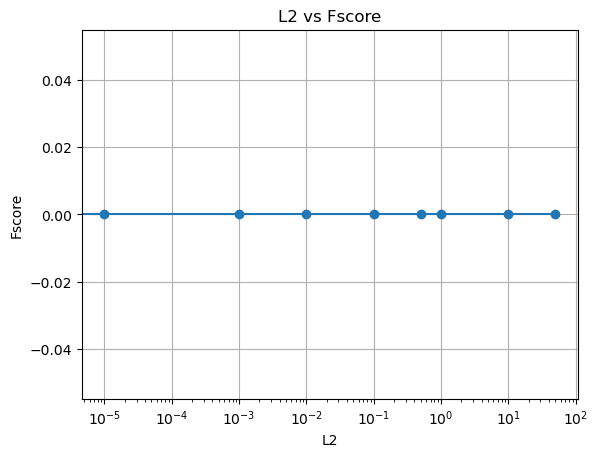

Best L2:  None
Best threshold:  None


In [13]:
importlib.reload(mod)
importlib.reload(pp)
importlib.reload(met)
# entrenamos el modelo
possible_L2 = [0, 0.00001, 0.001, 0.01, 0.1, 0.5, 1, 10, 50]
possible_threshold = [0.0001, 0.01, 0.3, 0.5, 0.7, 0.99]

best_L2, best_threshold = pp.cross_validation(train_data, possible_L2, possible_threshold)
print("Best L2: ", best_L2)
print("Best threshold: ", best_threshold)

#normalizamos X
# train_X = pp.min_max_scaling(train_X, train_X.min(), train_X.max())
# model = mod.Logistic_Regression(train_X, train_y, features)